#  Projekt zur Datenanalyse_Classification of Wisconsin Breast Cancer

### Table of contents

### chapter 1: Data Preparation

1. Ordinal Encoding- Target variable

2. Data Scaling   
   1. Standardization
  
3. Feature Selection
    1. pearon correlation 
    2. Lasso regression
    3. Visualization of Feature selektion 
  

    
### Chapter 2: Neural Network

1. Split the dataset
    1. Cross Validation- to overcome overfitting
     
2. Building a model
    1. Input Layers- Hidden layers- Output layers
    2. Compile the model
       1. Optimization Moethod:
           1.Stochastic Gradient Descent
           2. Adam
           3. Learning rate
           
3. Fitting the model
4. Loss- Accuracy
5. Evaluation metrics
    1. Confusion_metrics
    
6. Classification threshold
    1. Adjsting Threshold
    2. ROC und AUC
    3. Visualization of ROC- AUC
7. Interpretation des modelles
    1. Shap analysis
 
### Chapter 3 : Support vector machine
1. Data recuperation
2. Data Visualization
3. Correlation of features
4. Data Selection
5. Fiting the model
6. testing the model
7. tunning the hyperparameters
8. Confusion matrix

###  Chapter 4: 

    




### Title: Wisconsin Diagnostic Breast Cancer (WDBC):

###### Dataset  Description:

* **Extracted** : Clinical Sciences Center, Madison, WI 53792.
* Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
    * Rows :   569 Rows 
    * Columns :33 
* Class distribution: 
    * 357 benign
    * 212 malignant
    
* Here is an overviwe about the Feature :
<a id="infos"></a>
    * id
    * diagnosis
    * radius_mean
    * texture_mean
    * perimeter_mean
    * area_mean
    * smoothness_mean
    * compactness_mean
    * concavity_mean
    * concave points_mean
    * symmetry_mean
    * fractal_dimension_mean
    * radius_se
    * texture_se
    * perimeter_se
    * area_se
    * smoothness_se
    * compactness_se
    * concavity_se
    * concave points_se
    * symmetry_se ,
    * fractal_dimension_se
    * radius_worst
    * texture_worst
    * perimeter_worst
    * area_worst
    * smoothness_worst
    * compactness_worst
    * concavity_worst
    * concave points_worst
    * symmetry_worst
    * fractal_dimension_worst
    * Unnamed: 32

**For more Information :** :[ https://www.downloadmaghaleh.com/wp-content/uploads/edd/maghaleh/1398/yosefi.wisconsin-min.pdf ]

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.impute import SimpleImputer
from scipy import stats
from scipy.stats.stats import pearsonr
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

## Data preparation:

* Data apprearing
* As we notice our target variable is **diagnosis** with String value {**M:malignant** and **B:Benign**}
    * In order to make it easier to read the **output varible** , we transform [M to 1 and B to 0 ]


In [32]:
dt=pd.read_csv('Datasets/set.csv')
dt['diagnosis'] = dt['diagnosis'].map({'M':1,'B':0})
dt.head(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN


* remove all features , that do not play anay role by taking a decison or classification[ID or Unamed 32]

In [4]:
dt.drop('id',axis=1,inplace=True)
dt.drop('Unnamed: 32',axis=1,inplace=True)

* Let's check if there is any missing value

In [5]:
dt.isna().sum()# all right we don't have any missing value in out dataset

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

* Spliten the dataset into input and target variable

In [6]:
target_col='diagnosis'
X=dt.iloc[:,dt.columns!=target_col]
Y=dt['diagnosis']
print('Shape of Input variable is {}'.format(X.shape))
print('Shape of target variable is {}'.format(Y.shape))


Shape of Input variable is (569, 30)
Shape of target variable is (569,)


### Data Scaling:

* before we visualize our dataset , there are some informations , that we need to know for example[min, max, std, mean]
* Based on the dt.mean  we notice that there is a great variation betwen **area_mean** and **smoothness_mean**, this variation push us to think about Data scaling :
     * **Standarization** :Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
     * **Normalization**:Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.
     
* **Normalize VS Standardize**
    * Normalization is good to use when we know that the distribution of our dataset does not follow a Gaussion distribution. this can be useful in algorithm that do not assume any distribution of the data like k_Nearest Neignbours and neural network. Unlike normalization , **standardization** does not have a bouding range. So, eben if we have outliers in our data they will not be affected by standardization.
     

In [33]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.142575e-15,-6.558316e-15,-7.012551e-16,-8.339355e-16,6.083788e-15,-1.081346e-15,-3.703345e-16,9.935423e-16,-1.888550e-15,-1.424363e-15,...,-2.346102e-15,1.761138e-15,-1.214416e-15,5.919889e-16,-5.036783e-15,-2.118204e-15,6.899382e-16,-1.732650e-16,-2.454417e-15,2.438979e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.027864e+00,-2.227289e+00,-1.982759e+00,-1.453164e+00,-3.109349e+00,-1.608721e+00,-1.113893e+00,-1.260710e+00,-2.741705e+00,-1.818265e+00,...,-1.725382e+00,-2.222039e+00,-1.691872e+00,-1.221348e+00,-2.680337e+00,-1.442609e+00,-1.304683e+00,-1.743529e+00,-2.159060e+00,-1.600431e+00
25%,-6.887793e-01,-7.253249e-01,-6.913472e-01,-6.666089e-01,-7.103378e-01,-7.464292e-01,-7.430941e-01,-7.372951e-01,-7.026215e-01,-7.220040e-01,...,-6.743279e-01,-7.479711e-01,-6.889721e-01,-6.415713e-01,-6.906227e-01,-6.804845e-01,-7.558491e-01,-7.557349e-01,-6.412994e-01,-6.913035e-01
50%,-2.148925e-01,-1.045442e-01,-2.357726e-01,-2.949274e-01,-3.486040e-02,-2.217454e-01,-3.419391e-01,-3.973715e-01,-7.156354e-02,-1.781226e-01,...,-2.688030e-01,-4.347738e-02,-2.857288e-01,-3.408813e-01,-4.680159e-02,-2.692639e-01,-2.180402e-01,-2.232725e-01,-1.272975e-01,-2.162538e-01
75%,4.689800e-01,5.836621e-01,4.992377e-01,3.631877e-01,6.356397e-01,4.934227e-01,5.255994e-01,6.463664e-01,5.303125e-01,4.705693e-01,...,5.215568e-01,6.577623e-01,5.398040e-01,3.572747e-01,5.970195e-01,5.391944e-01,5.306742e-01,7.118836e-01,4.497425e-01,4.503661e-01
max,3.967796e+00,4.647799e+00,3.972634e+00,5.245913e+00,4.766717e+00,4.564409e+00,4.239858e+00,3.924477e+00,4.480808e+00,4.906602e+00,...,4.090590e+00,3.882489e+00,4.283568e+00,5.924959e+00,3.951897e+00,5.108382e+00,4.696536e+00,2.683516e+00,6.040726e+00,6.840837e+00


In [35]:
X= (X - X.mean()) / (X.std()) 
X.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214


#### Feature Selection:
* Fitting the model with 33 Columns is not only computationally intensive, but also does not make any  sense for the machine to learn inputs that does not play any role by taking decision or  classification, futhermore reducing the number of features improve the accuracy of the model .
* **Goals 1**: Reducing the number of inputs :

    * **Percent Missing value** :Drop variables that have a very high % of missing 
    * **Amount of variation**: Drop or reviwe variables that have a very low variation
    * **Correlation with the target** this technique called **Filter-Based Feature Selection Methods**  well-known correlation is similarity measures between two features. If input and target  are linearly dependent , then their correlation coefficient is (+-1). If there are  uncorrelated , the correlation coefficient  is 0, using Correlation we gonna drop variables  that have a very low correlation with the target.
    * Pearsonr : gives us two values , one **pearson correlation score** (help us to measure the dependancy between 2 features ) and **p_value**  gives us the probability of finding an observation under an assumption that a particular hypothesis is True. This probability is used to accept or reject that hypothesis.Removal of different features from the dataset will have diffrent effects on the p_value for the dataset. These measured p_values can be used to decide whether to keep a feature or not. 
    
#### Frage: How many features should i take?
* may be at the begining i should take (ex:4 features) and after that a should fit my model based on those features , and check the accuracy , after that i can add or remove a features to see if my model performe godd or bad ( **TRY OUT**)



#### Calcul pearson between each input and target :

In [38]:
pearson_list=[]
pearson=[]
for col in X.columns:
        pearson=pearsonr(X[col],Y)
        pearson_list.append([col,pearson[0],pearson[1]])
    
pearson_list 
    
df_pearson=pd.DataFrame(pearson_list,columns=['Features','Pearson’s correlation coefficient','P_value'])
df_pearson=df_pearson.sort_values(by=['Pearson’s correlation coefficient'],ascending=False)

In [39]:
df_pearson

,Features,Pearson’s correlation coefficient,P_value
27,concave points_worst,0.793566,1.969100e-124
22,perimeter_worst,0.782914,5.771397e-119
7,concave points_mean,0.776614,7.101150e-116
20,radius_worst,0.776454,8.482292e-116
2,perimeter_mean,0.742636,8.436251e-101
23,area_worst,0.733825,2.828848e-97
0,radius_mean,0.730029,8.465941e-96
3,area_mean,0.708984,4.734564e-88
6,concavity_mean,0.696360,9.966556e-84
26,concavity_worst,0.659610,2.464664e-72


* **Feature Selection using Lasso regression:**
* Feature selection is one of the most important steps of a machine learning pipeline.  Fortunately , some models may help us accomplish this goal  by giving us their own interpretation of feature importance. One of the efficient way in this case is **Lasso regression**
<img src= lassoregression.PNG></h3> 

* the first term of the formal is **MSE** , divided by 2. aj  is the coefficient of the j-th feature. the final term is called l1 penalty  and alpha is hyperparamters that tunes the intensity  of this panalty term.**the higher the coefficient of a feature , the higher the value of the cost function**.
* So the idea of Lasso regression is to optimize the cost function reducing the absolute values of the coefficients.
* **How can we use it for feature selection?**
    * We fit a Lasso regression on a scaled version of our dataset and we consider only those features that have a coefficient different from 0
    


In [25]:
#First we should split our Data into two  training data and test data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33, random_state=42)


# now we have to build our Model, optimize its hyperparameter and train it on the training dataset
# first of all our dataset  need to be scaled in advance using Pipline

pipeline=Pipeline([
                    ('scaler',StandardScaler()),
                    ('model',Lasso())])
# now we have to optimize the alpha for our lasso regression
# we gonna test alpha with several values from to 10 with 0.1 step
#for each alpha value we calculate the average value of the mean squared error in 5 folds cross validation
# and select alpha that minimizes such average performance metrics.
# we use neg_mean_squared_error  because the grid search tries to miximize the performance metrics,
# so we add minus sign to minimize the mean squared error.

search=GridSearchCV(pipeline,{'model__alpha':np.arange(0.1,10,0.1)},
                   cv=5,
                   scoring="neg_mean_squared_error",verbose=3)

# fit the grid search
search.fit(X_train,Y_train)

# the best value for alpha is:
search.best_params_
#get the values of the coefficients of Lasso regression:


Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.067 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.095 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.088 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.101 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.077 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.102 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.121 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.126 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.141 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.113 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.161 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

[CV 1/5] END ..model__alpha=2.3000000000000003;, score=-0.229 total time=   0.0s
[CV 2/5] END ..model__alpha=2.3000000000000003;, score=-0.236 total time=   0.0s
[CV 3/5] END ..model__alpha=2.3000000000000003;, score=-0.225 total time=   0.0s
[CV 4/5] END ..model__alpha=2.3000000000000003;, score=-0.267 total time=   0.0s
[CV 5/5] END ..model__alpha=2.3000000000000003;, score=-0.230 total time=   0.0s
[CV 1/5] END ..model__alpha=2.4000000000000004;, score=-0.229 total time=   0.0s
[CV 2/5] END ..model__alpha=2.4000000000000004;, score=-0.236 total time=   0.0s
[CV 3/5] END ..model__alpha=2.4000000000000004;, score=-0.225 total time=   0.0s
[CV 4/5] END ..model__alpha=2.4000000000000004;, score=-0.267 total time=   0.0s
[CV 5/5] END ..model__alpha=2.4000000000000004;, score=-0.230 total time=   0.0s
[CV 1/5] END ..model__alpha=2.5000000000000004;, score=-0.229 total time=   0.0s
[CV 2/5] END ..model__alpha=2.5000000000000004;, score=-0.236 total time=   0.0s
[CV 3/5] END ..model__alpha=

[CV 5/5] END .................model__alpha=4.7;, score=-0.230 total time=   0.0s
[CV 1/5] END .................model__alpha=4.8;, score=-0.229 total time=   0.0s
[CV 2/5] END .................model__alpha=4.8;, score=-0.236 total time=   0.0s
[CV 3/5] END .................model__alpha=4.8;, score=-0.225 total time=   0.0s
[CV 4/5] END .................model__alpha=4.8;, score=-0.267 total time=   0.0s
[CV 5/5] END .................model__alpha=4.8;, score=-0.230 total time=   0.0s
[CV 1/5] END .................model__alpha=4.9;, score=-0.229 total time=   0.0s
[CV 2/5] END .................model__alpha=4.9;, score=-0.236 total time=   0.0s
[CV 3/5] END .................model__alpha=4.9;, score=-0.225 total time=   0.0s
[CV 4/5] END .................model__alpha=4.9;, score=-0.267 total time=   0.0s
[CV 5/5] END .................model__alpha=4.9;, score=-0.230 total time=   0.0s
[CV 1/5] END .................model__alpha=5.0;, score=-0.229 total time=   0.0s
[CV 2/5] END ...............

[CV 3/5] END .................model__alpha=7.2;, score=-0.225 total time=   0.0s
[CV 4/5] END .................model__alpha=7.2;, score=-0.267 total time=   0.0s
[CV 5/5] END .................model__alpha=7.2;, score=-0.230 total time=   0.0s
[CV 1/5] END .................model__alpha=7.3;, score=-0.229 total time=   0.0s
[CV 2/5] END .................model__alpha=7.3;, score=-0.236 total time=   0.0s
[CV 3/5] END .................model__alpha=7.3;, score=-0.225 total time=   0.0s
[CV 4/5] END .................model__alpha=7.3;, score=-0.267 total time=   0.0s
[CV 5/5] END .................model__alpha=7.3;, score=-0.230 total time=   0.0s
[CV 1/5] END .................model__alpha=7.4;, score=-0.229 total time=   0.0s
[CV 2/5] END .................model__alpha=7.4;, score=-0.236 total time=   0.0s
[CV 3/5] END .................model__alpha=7.4;, score=-0.225 total time=   0.0s
[CV 4/5] END .................model__alpha=7.4;, score=-0.267 total time=   0.0s
[CV 5/5] END ...............

[CV 1/5] END .................model__alpha=9.3;, score=-0.229 total time=   0.0s
[CV 2/5] END .................model__alpha=9.3;, score=-0.236 total time=   0.0s
[CV 3/5] END .................model__alpha=9.3;, score=-0.225 total time=   0.0s
[CV 4/5] END .................model__alpha=9.3;, score=-0.267 total time=   0.0s
[CV 5/5] END .................model__alpha=9.3;, score=-0.230 total time=   0.0s
[CV 1/5] END .................model__alpha=9.4;, score=-0.229 total time=   0.0s
[CV 2/5] END .................model__alpha=9.4;, score=-0.236 total time=   0.0s
[CV 3/5] END .................model__alpha=9.4;, score=-0.225 total time=   0.0s
[CV 4/5] END .................model__alpha=9.4;, score=-0.267 total time=   0.0s
[CV 5/5] END .................model__alpha=9.4;, score=-0.230 total time=   0.0s
[CV 1/5] END .................model__alpha=9.5;, score=-0.229 total time=   0.0s
[CV 2/5] END .................model__alpha=9.5;, score=-0.236 total time=   0.0s
[CV 3/5] END ...............

{'model__alpha': 0.1}

In [31]:
coefficient=search.best_estimator_.named_steps['model'].coef_
# the importnace of a feature is the value of it's coefficient, so:
importance=np.abs(coefficient)
# features list:
features=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
np.array(features)[importance>0]

array(['concave points_mean', 'radius_worst', 'texture_worst',
       'concave points_worst'], dtype='<U23')

#### Visualize features importance

<AxesSubplot:xlabel='MyValues', ylabel='MyFeatures'>

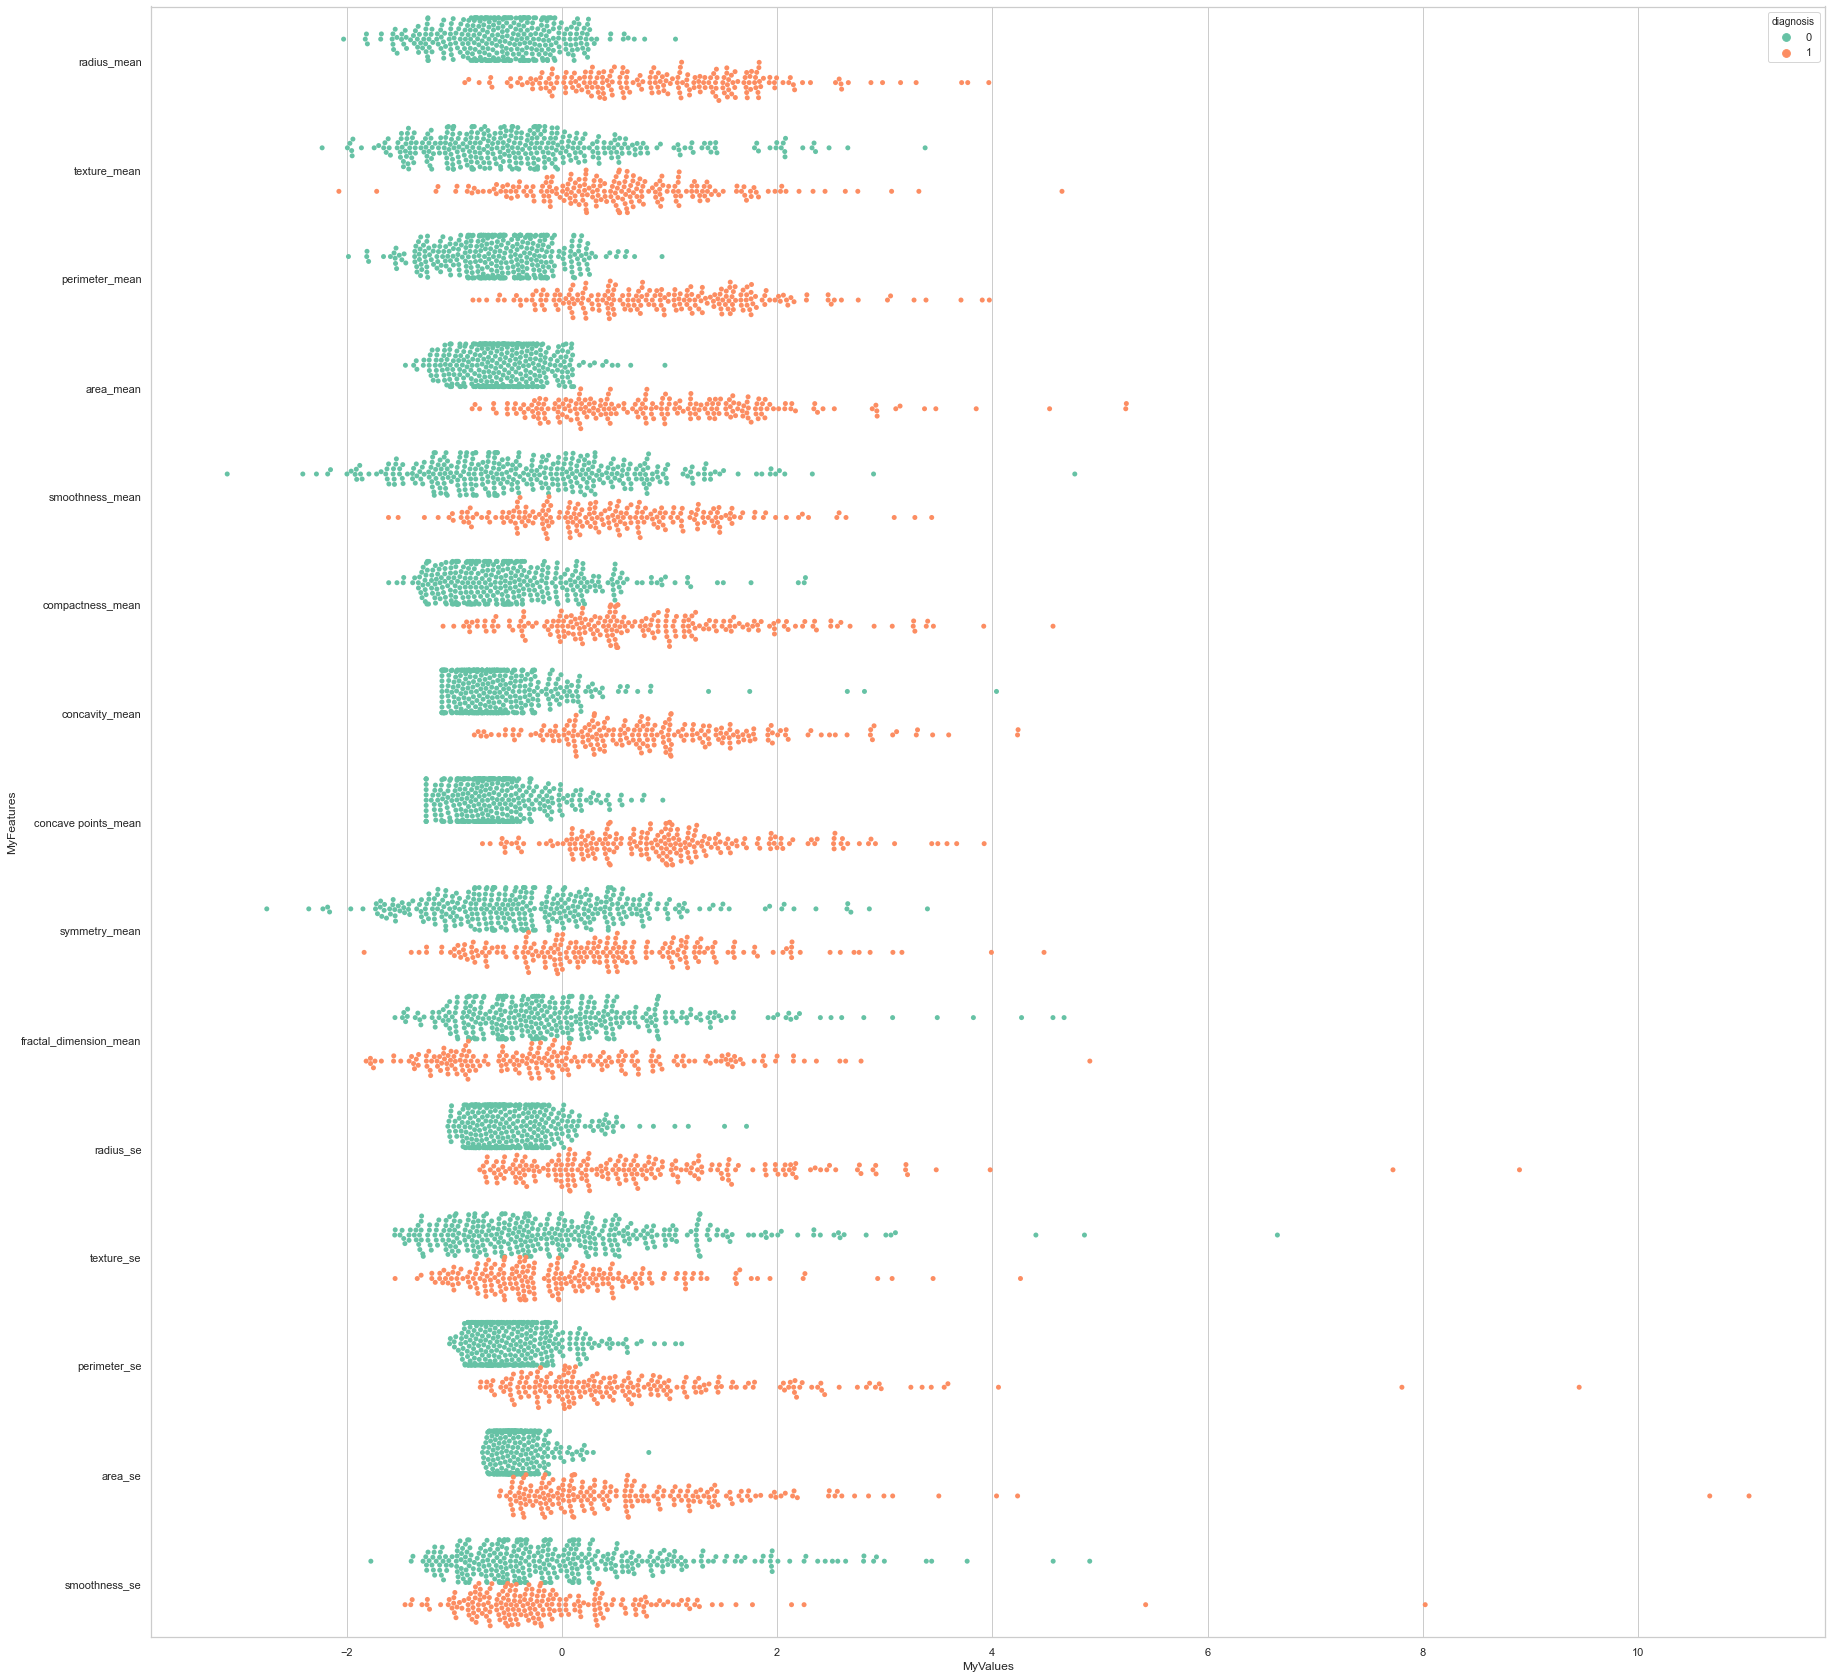

In [11]:
sns.set(style="whitegrid")

data = pd.concat([Y,X.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="MyFeatures",
                    value_name='MyValues')
plt.figure(figsize=(30,30))
sns.swarmplot(x="MyValues", y= "MyFeatures", hue="diagnosis", data=data,palette="Set2", dodge=True)


pandas.core.frame.DataFrame

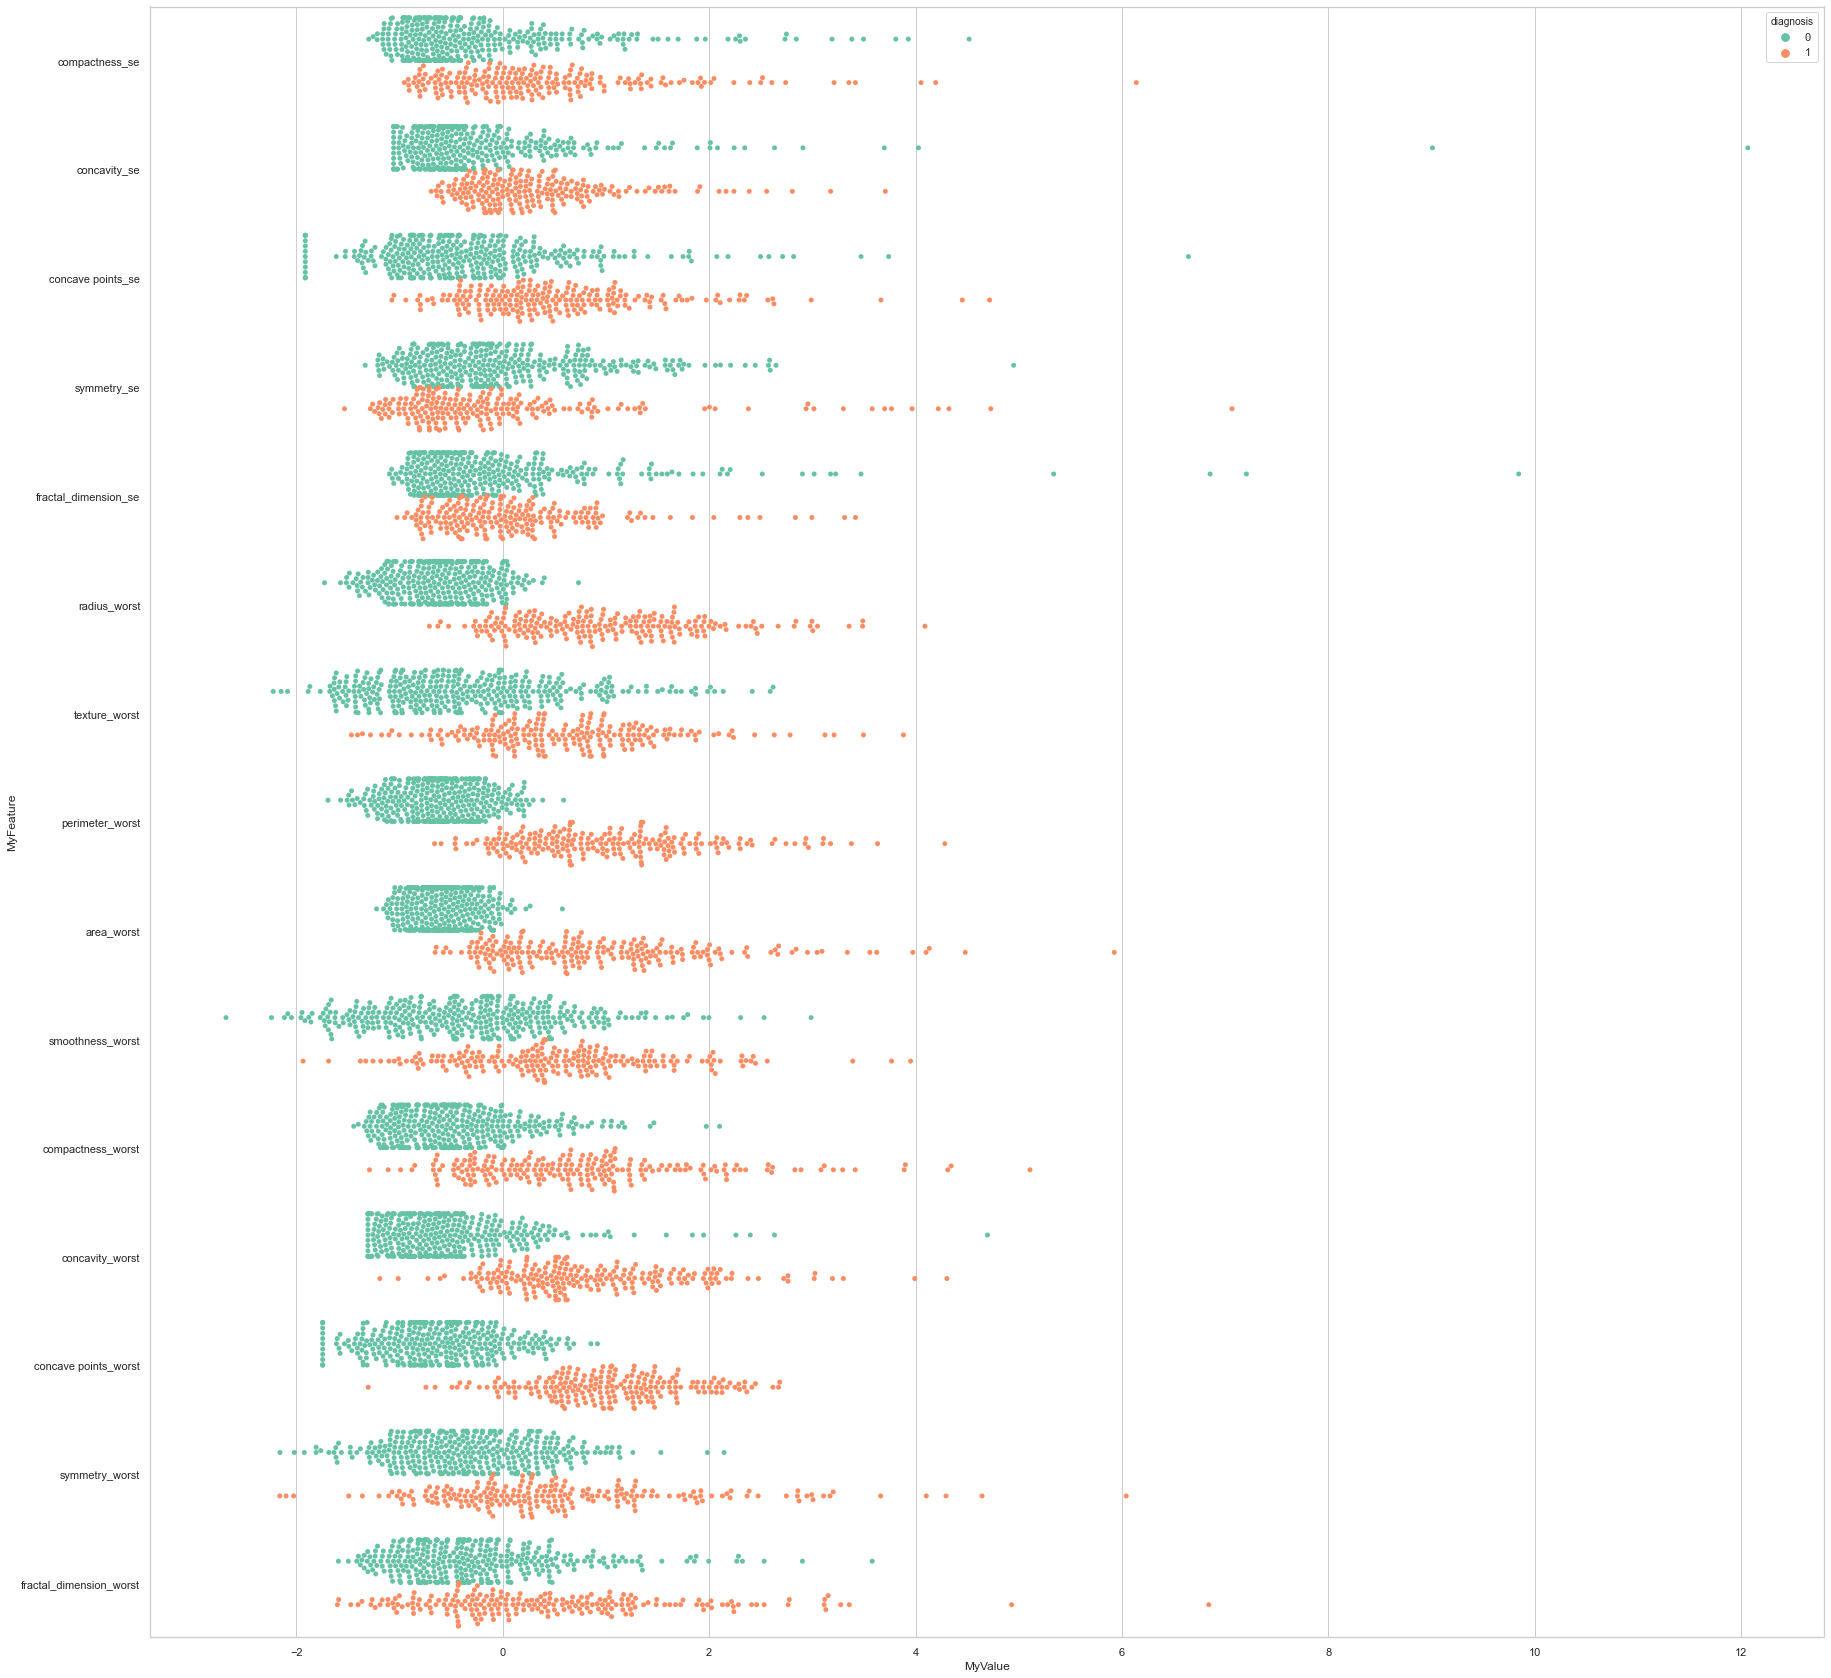

In [12]:
sns.set(style="whitegrid")

data = pd.concat([Y,X.iloc[:,15:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="MyFeature",
                    value_name='MyValue')
plt.figure(figsize=(30,30))
sns.swarmplot(x="MyValue", y= "MyFeature", hue="diagnosis", data=data,palette="Set2", dodge=True)

type(data)


##### the new dataset with best 5 features:

In [13]:
X_neu=df_pearson['Features'][:5].tolist()
X_select=X[X_neu]
X_select


,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean
0,2.294058,2.301575,2.530249,1.885031,1.268817
1,1.086129,1.533776,0.547662,1.804340,1.684473
2,1.953282,1.346291,2.035440,1.510541,1.565126
3,2.173873,-0.249720,1.450431,-0.281217,-0.592166
4,0.728618,1.337363,1.427237,1.297434,1.775011
...,...,...,...,...,...
564,1.627719,1.751022,2.318924,1.899514,2.058974
565,0.733182,1.420690,1.262558,1.535369,1.614511
566,0.413705,0.578492,0.105684,0.560868,0.672084
567,2.287972,2.301575,2.656528,1.959515,1.980781
